<a href="https://colab.research.google.com/github/Areej255/Data_Sci_Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing libs
# for data manipulation
import pandas as pd
# for numerical computations
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
# for advanced visualizations
import seaborn as sns

In [5]:
# load the dataset
data = pd.read_csv("/content/creditcard.csv")
# inspect the dataset
print("Dataset Head:")
# display the first 5 rows of the dataset
print(data.head())

Dataset Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

In [6]:
print("Dataset Information:")
# got an overview of the dataset including dt & not null counts
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162557 entries, 0 to 162556
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    162557 non-null  float64
 1   V1      162557 non-null  float64
 2   V2      162557 non-null  float64
 3   V3      162557 non-null  float64
 4   V4      162557 non-null  float64
 5   V5      162557 non-null  float64
 6   V6      162557 non-null  float64
 7   V7      162557 non-null  float64
 8   V8      162557 non-null  float64
 9   V9      162557 non-null  float64
 10  V10     162557 non-null  float64
 11  V11     162557 non-null  float64
 12  V12     162557 non-null  float64
 13  V13     162557 non-null  float64
 14  V14     162557 non-null  float64
 15  V15     162557 non-null  float64
 16  V16     162557 non-null  float64
 17  V17     162557 non-null  float64
 18  V18     162557 non-null  float64
 19  V19     162557 non-null  float64
 20  V20     162557 non-null  fl

In [7]:
print("Basic Statistics:")
# describe the statistical summary of the data
print(data.describe())

Basic Statistics:
                Time             V1             V2             V3  \
count  162557.000000  162557.000000  162557.000000  162557.000000   
mean    58171.885363      -0.198303       0.051721       0.550907   
std     25278.368459       1.844868       1.612322       1.361511   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     40328.000000      -1.001231      -0.527555       0.018160   
50%     58863.000000      -0.221015       0.118986       0.665016   
75%     76367.000000       1.175741       0.811027       1.320090   
max    115211.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  162557.000000  162557.000000  162557.000000  162557.000000   
mean        0.134962      -0.200534       0.064280      -0.091888   
std         1.363530       1.334221       1.291914       1.207970   
min        -5.519697     -42.147898     -26.160506     -43.557242   
25%        -0.7

In [8]:
# checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
# display columns with missing values if any
print(missing_values[missing_values>0])

Missing Values:
V28       1
Amount    1
Class     1
dtype: int64


In [9]:
# understand the class distribution(fraud VS legitimate)
# the "class" column is the target variable: 0=legitimate, 1=fraud
print("Class Distribution:")
print(data["Class"].value_counts())


Class Distribution:
Class
0.0    162200
1.0       356
Name: count, dtype: int64


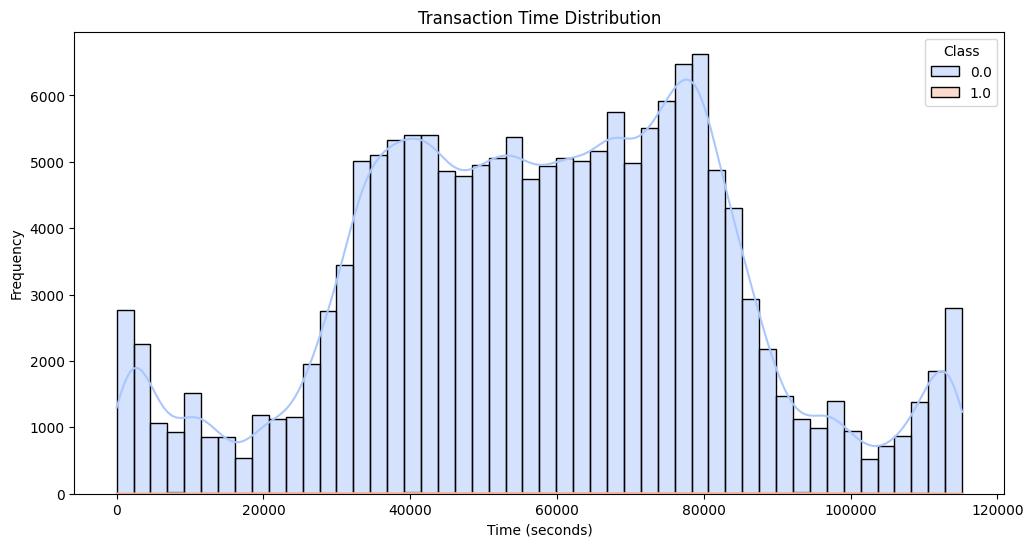

In [13]:
# Analyze the 'Time' Feature
plt.figure(figsize=(12, 6))
# kde=True adds a kernel density estimate (smooth curve over the histogram).
# hue='Class' separates the data into two distributions (fraud vs legitimate).
sns.histplot(data=data, x='Time', hue='Class', kde=True, palette='coolwarm', bins=50)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


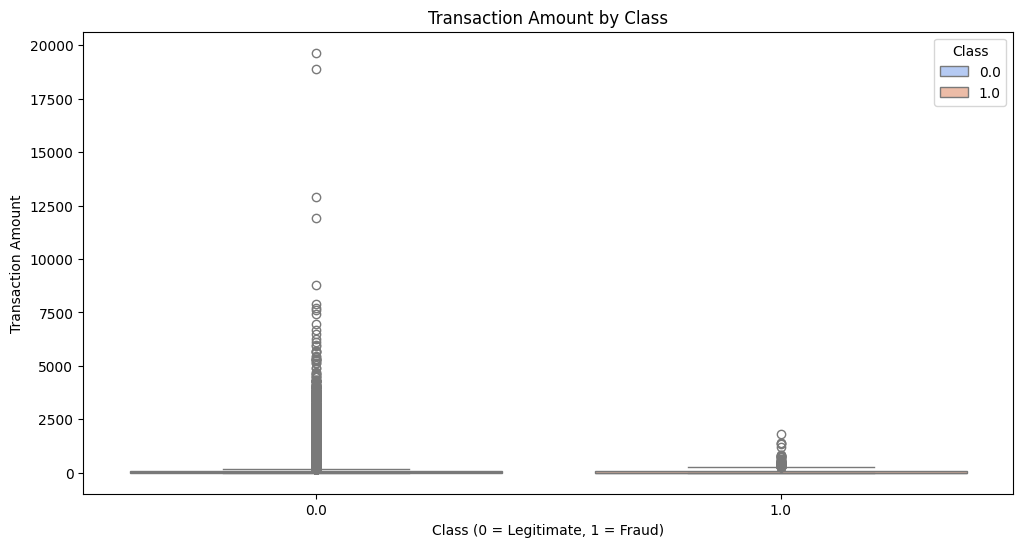

In [19]:
# Step 6: Analyze the 'Amount' Feature
# Understand the transaction amounts for both classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data,hue="Class", palette='coolwarm', dodge=False)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


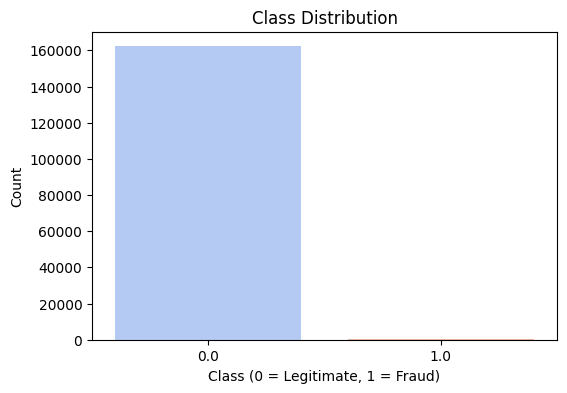

In [18]:
# Visualize the class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=data, hue="Class", palette="coolwarm", dodge=False,legend=False)  # Explicitly set x
plt.title("Class Distribution")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

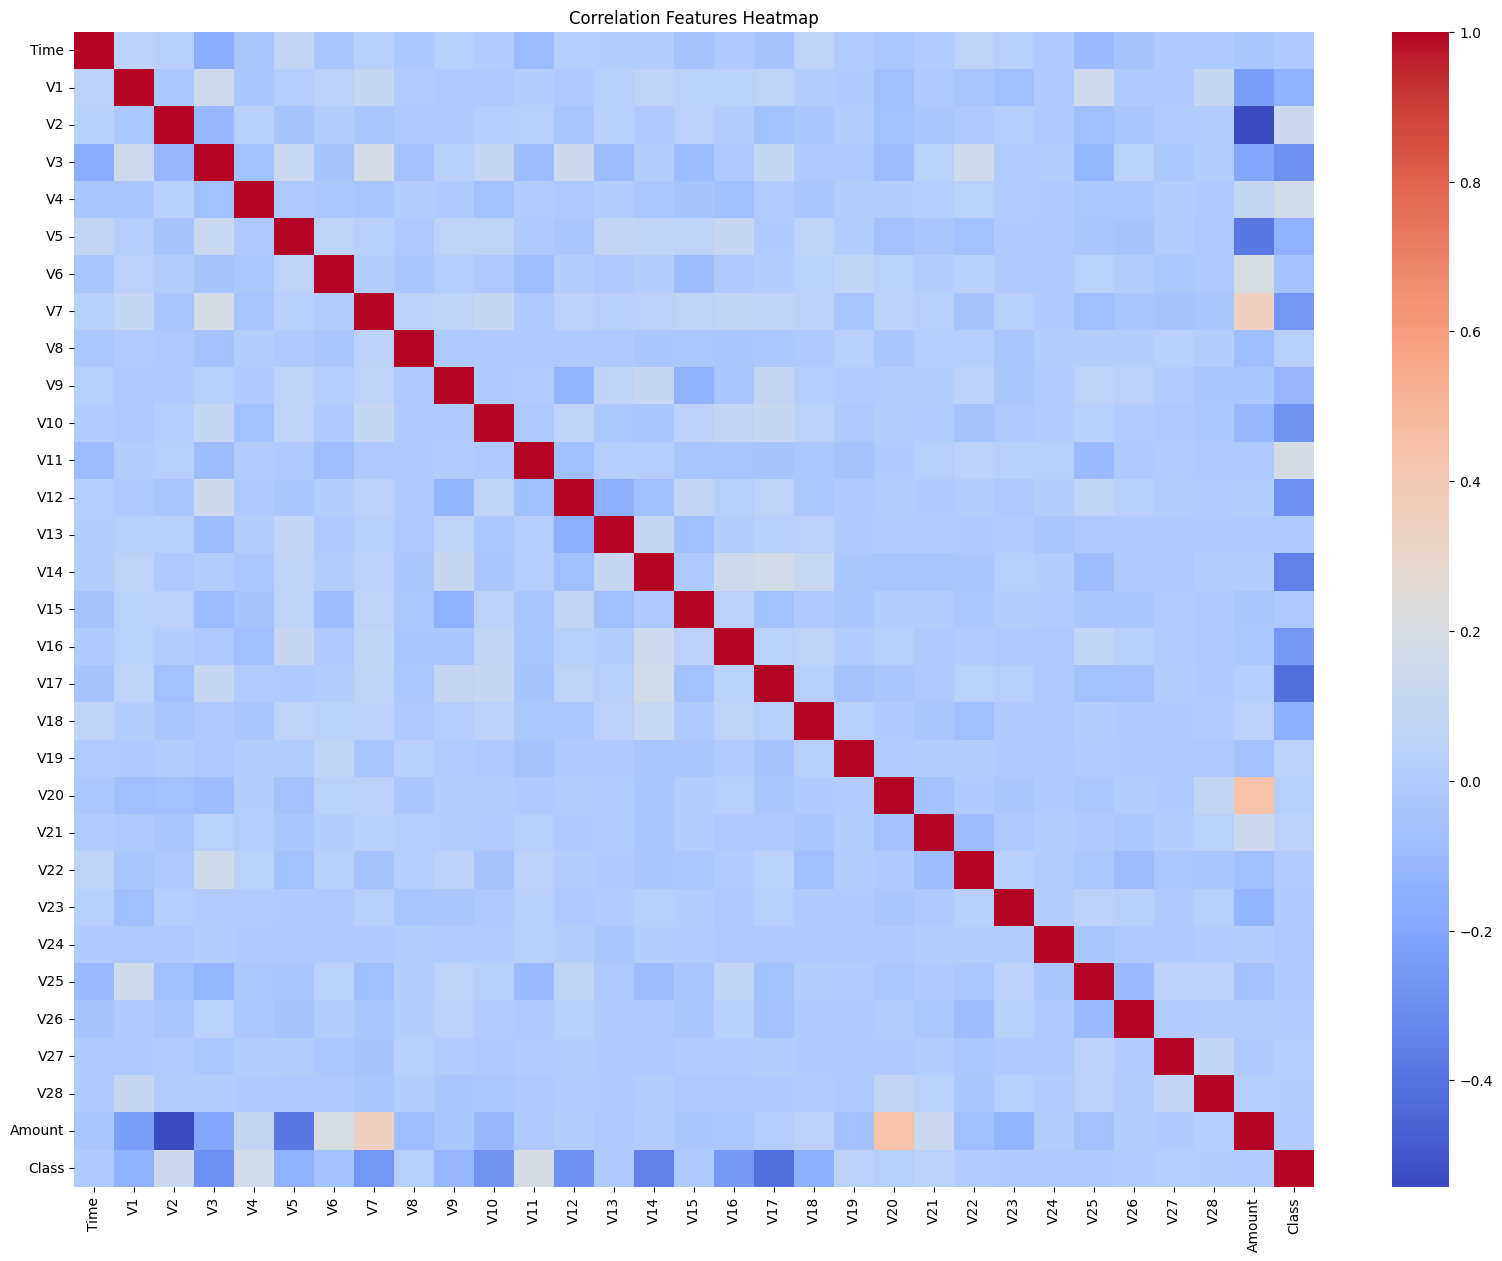

In [20]:
# correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, cmap="coolwarm",annot=False)
plt.title("Correlation Features Heatmap")
plt.show()

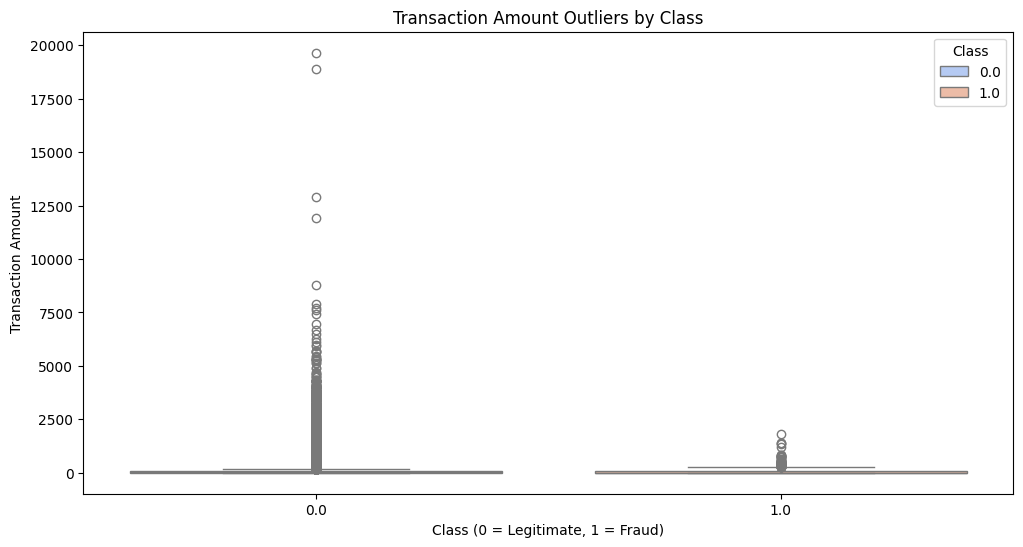

In [24]:
# detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Amount', data=data, hue='Class', palette='coolwarm')
plt.title("Transaction Amount Outliers by Class")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

In [28]:
# feature distribution
# Features V1 to V28 generates a list
feature_columns =[f"V{i}" for i in range(1,29)]
# fraudulent transactions
fraud_data = data[data["Class"]==1]
# legitimate transactions
legit_data = data[data["Class"]==0]
print("First few rows of Fraudulent Transactions:")
print(fraud_data.head())

print("\nFirst few rows of Legitimate Transactions:")
print(legit_data.head())

# display the number of transactions in each category
print("Number of Fraudulent Transactions:", len(fraud_data))
print("Number of Legitimate Transactions:", len(legit_data))

First few rows of Fraudulent Transactions:
        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amoun

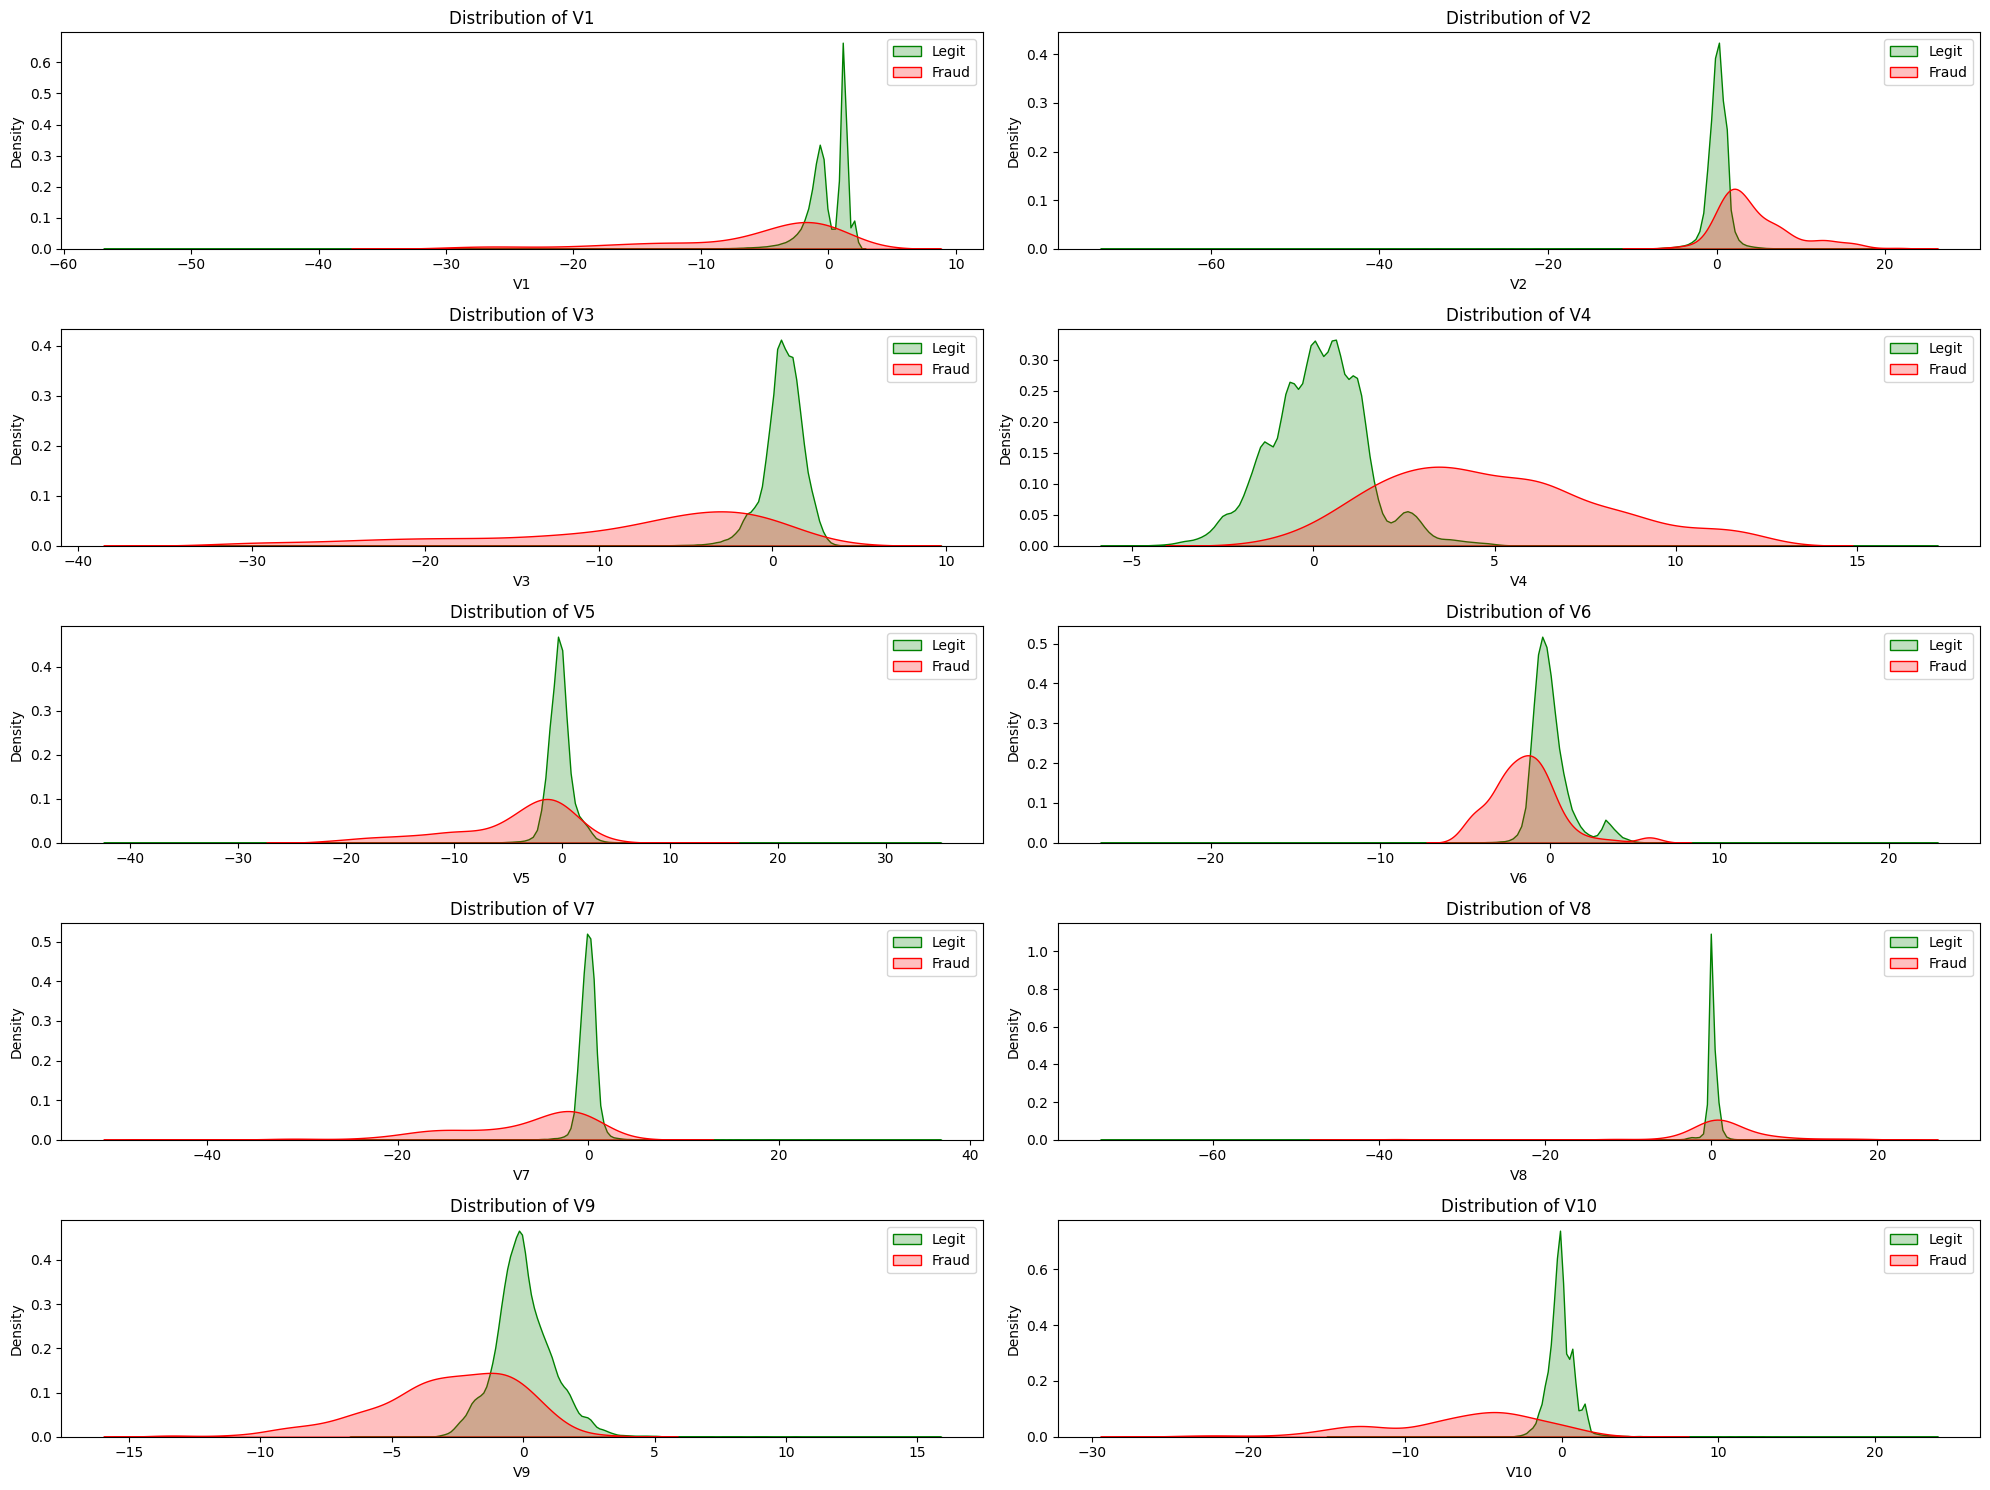

In [30]:
plt.figure(figsize=(20, 15))
for idx, col in enumerate(feature_columns[:10]):  # Plot first 10 features
    # print(f"Index: {}")
    plt.subplot(5, 2, idx + 1)
    # Creates kernel density plots to compare the
    # distribution of each feature for legitimate vs fraudulent transactions.
    sns.kdeplot(legit_data[col], label='Legit', fill=True, color='green')
    sns.kdeplot(fraud_data[col], label='Fraud', fill=True, color='red')
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()


In [31]:
# summary of insights
fraudulent_ratio = data["Class"].mean()*100
print(f"Fraudulent Transactions Ratio: {fraudulent_ratio:.2f}%")

Fraudulent Transactions Ratio: 0.22%
